## Copy first few blocks from `AnyoneAI - Sprint Project 01.ipynb`

In [2]:
# Importing the necessary libraries
from pandas import DataFrame
from sqlalchemy import create_engine
from typing import Dict
from pathlib import Path
import pandas as pd

from src.transform import QueryEnum
from src import config
from src.transform import run_queries
from src.extract import extract
from src.load import load

# Create the database sql file
Path(config.SQLITE_BD_ABSOLUTE_PATH).touch()

# Create the database connection
ENGINE = create_engine(rf"sqlite:///{config.SQLITE_BD_ABSOLUTE_PATH}", echo=False)

csv_folder = config.DATASET_ROOT_PATH
public_holidays_url = config.PUBLIC_HOLIDAYS_URL

# 1. Get the mapping of the csv files to the table names.
csv_table_mapping = config.get_csv_to_table_mapping()

# 2. Extract the data from the csv files, holidays and load them into the dataframes.
csv_dataframes = extract(csv_folder, csv_table_mapping, public_holidays_url)

load(data_frames=csv_dataframes, database=ENGINE)

## Always have the data schema on hand!

olist_customers_dataset.csv -> olist_customers
olist_geolocation_dataset.csv -> olist_geolocation
olist_order_items_dataset.csv -> olist_order_items
olist_order_payments_dataset.csv -> olist_order_payments
olist_order_reviews_dataset.csv -> olist_order_reviews
olist_orders_dataset.csv -> olist_orders
olist_products_dataset.csv -> olist_products
olist_sellers_dataset.csv -> olist_sellers
product_category_name_translation.csv -> product_category_name_translation


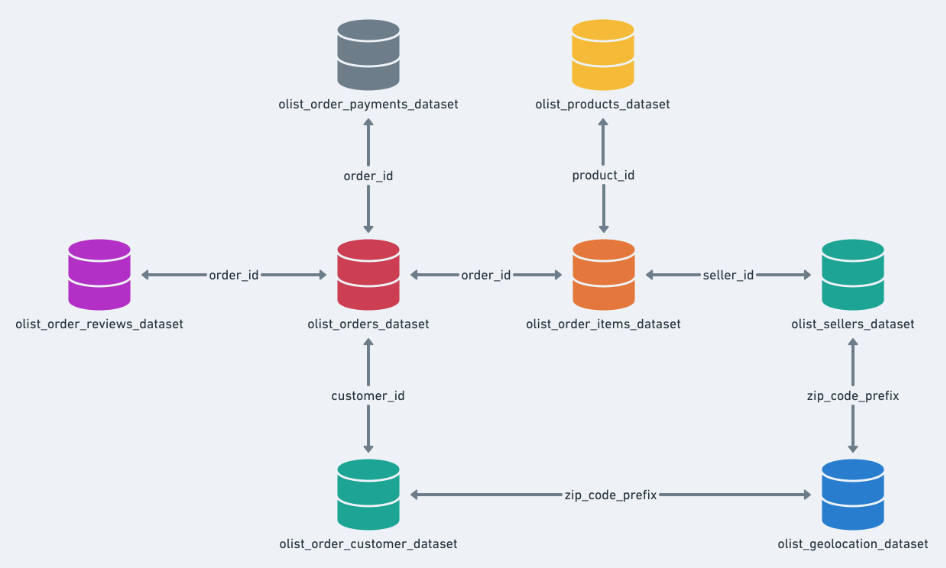

In [85]:
from PIL import Image

# Print the name of the tables in our data warehouse
for k,v in csv_table_mapping.items():
    print(f'{k} -> {v}')

Image.open('images/data_schema.png')

## Running a few queries on our database

1. Show the first 5 orders from `olist_orders`.
2. Filter to those that have already been delivered.
3. Show the order_id, delivery day, month, and year of these orders.
4. Show first 5 orders from `olist_order_payments`.
5. Show the order_id, delivery date, and revenue of these orders.
6. Are there any repeated orders?
7. CLEANING: Take only the cheapest entry for each of order_id in `olist_order_payments`.

In [ ]:
# 1. Show the first 5 orders from olist_orders

query = \
"""
SELECT * FROM olist_orders

"""

df = pd.read_sql(query, ENGINE)
print(f'Number of rows: {df.shape[0]}')
df.head()

Number of rows: 99441


,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [53]:
# 2. Filter to those that have already been delivered and have a non-null delivery date.

query = \
"""
SELECT * FROM olist_orders
WHERE order_status = 'delivered' AND order_delivered_customer_date IS NOT NULL
"""

df = pd.read_sql(query, ENGINE)
print(f'Number of rows: {df.shape[0]}')
df.head()

Number of rows: 96470


,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [54]:
# 3. Show the order_id, delivery day, month, and year of these orders.

query = \
"""
SELECT 
    order_id,  
    STRFTIME('%d', order_delivered_customer_date) AS day,
    STRFTIME('%m', order_delivered_customer_date) AS month,
    STRFTIME('%Y', order_delivered_customer_date) AS year
FROM olist_orders
WHERE order_status = 'delivered' AND order_delivered_customer_date IS NOT NULL
"""

df = pd.read_sql(query, ENGINE)
df.head()

,order_id,day,month,year
0,e481f51cbdc54678b7cc49136f2d6af7,10,10,2017
1,53cdb2fc8bc7dce0b6741e2150273451,07,08,2018
2,47770eb9100c2d0c44946d9cf07ec65d,17,08,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,02,12,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,16,02,2018


In [55]:
# 4. Show first 5 orders from `olist_order_payments`.

query = \
"""
SELECT * FROM olist_order_payments
"""

df = pd.read_sql(query, ENGINE)
df.head()

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [59]:
# 5. Show the order_id, delivery date, and revenue of these orders.

query = \
"""
SELECT 
    o.order_id,
    STRFTIME('%d', order_delivered_customer_date) AS day,
    STRFTIME('%m', order_delivered_customer_date) AS month,
    STRFTIME('%Y', order_delivered_customer_date) AS year,
    payment_value
FROM
olist_orders o JOIN olist_order_payments op ON o.order_id = op.order_id
"""

df = pd.read_sql(query, ENGINE)
df.head()

,order_id,day,month,year,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,10,10,2017,2.00
1,e481f51cbdc54678b7cc49136f2d6af7,10,10,2017,18.12
2,e481f51cbdc54678b7cc49136f2d6af7,10,10,2017,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,07,08,2018,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,17,08,2018,179.12


In [61]:
# 6. Are there any repeated orders?

query = \
"""
SELECT order_id, count(*) AS count FROM olist_order_payments GROUP BY order_id ORDER BY count DESC
"""

df = pd.read_sql(query, ENGINE)
df.head()

,order_id,count
0,fa65dad1b0e818e3ccc5cb0e39231352,29
1,ccf804e764ed5650cd8759557269dc13,26
2,285c2e15bebd4ac83635ccc563dc71f4,22
3,895ab968e7bb0d5659d16cd74cd1650c,21
4,fedcd9f7ccdc8cba3a18defedd1a5547,19


In [62]:
# 7. CLEANING: Take only the cheapest entry for each of order_id in `olist_order_payments`.

query = \
"""
SELECT order_id, MIN(payment_value) FROM olist_order_payments
GROUP BY order_id
"""

df = pd.read_sql(query, ENGINE)
df.head()

,order_id,MIN(payment_value)
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
